In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
sns.set_theme(context='paper',font_scale=1.2,style='whitegrid')
figsize = (5,5)
plot_folder = Path('../figures/confidence_rmsd_scatters')
plot_folder.mkdir(exist_ok=True)

In [2]:
pdbs_to_remove = {'7l7e_C0-D0'}

-0.5964869993408156


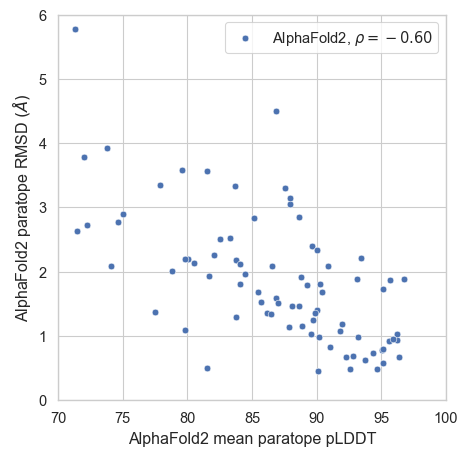

In [3]:
af2_plddt_antibody_df = pd.read_csv('../data/AF2_antibody_rmsd_plddt_multi_regions.csv')
af2_plddt_antibody_df = af2_plddt_antibody_df.loc[[pdb not in pdbs_to_remove for pdb in af2_plddt_antibody_df['pdb']]]

fig, ax = plt.subplots(figsize=figsize)
pearson, _ = pearsonr(x=af2_plddt_antibody_df['plddt_ave_para_epi'],y=af2_plddt_antibody_df['rmsd_para_epi'],)
sns.scatterplot(data=af2_plddt_antibody_df, y='rmsd_para_epi', x='plddt_ave_para_epi',ax=ax,
                label=rf'AlphaFold2, $\rho= {pearson:.2f}$')

print(pearson)
ax.set_ylim([-0,6])
ax.set_xlim([70,100])
ax.set_xlabel('AlphaFold2 mean paratope pLDDT')
ax.set_ylabel(r'AlphaFold2 paratope RMSD $(\AA)$')
fig.savefig(plot_folder/'AlphaFold2_plddt_paratope_rmsd.png', dpi = 200)


-0.6489629400540674


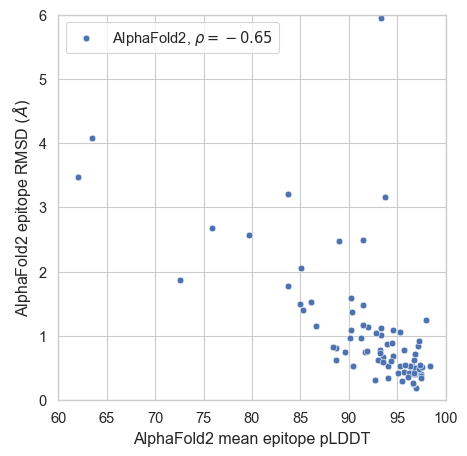

In [7]:
af2_plddt_antigen_df = pd.read_csv('../data/AF2_antigen_rmsd_plddt_multi_regions.csv')
af2_plddt_antigen_df = af2_plddt_antigen_df.loc[[pdb not in pdbs_to_remove for pdb in af2_plddt_antigen_df['pdb']]]

fig, ax = plt.subplots(figsize=figsize)
pearson, _ = pearsonr(x=af2_plddt_antigen_df['plddt_ave_para_epi'],y=af2_plddt_antigen_df['rmsd_para_epi'],)
sns.scatterplot(data=af2_plddt_antigen_df, y='rmsd_para_epi', x='plddt_ave_para_epi',ax=ax,
                label=rf'AlphaFold2, $\rho= {pearson:.2f}$')
ax.legend(loc='upper left')

print(pearson)
ax.set_ylim([-0,6])
ax.set_xlim([60,100])
ax.set_xlabel('AlphaFold2 mean epitope pLDDT')
ax.set_ylabel(r'AlphaFold2 epitope RMSD $(\AA)$')
fig.savefig(plot_folder/'AlphaFold2_epitope_paratope_rmsd.png', dpi = 200)


0.6878236677927102


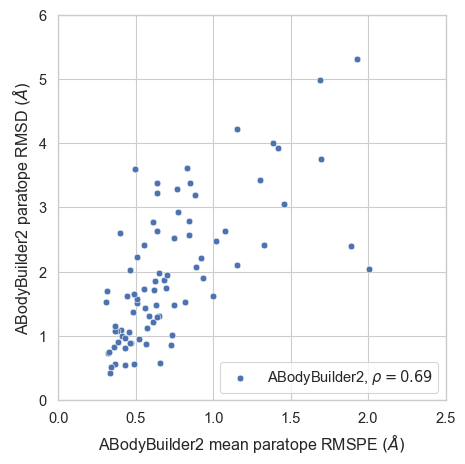

In [8]:
abb2_conf_df = pd.read_csv('../data/ABB2_antibody_rmsd_conf.csv')
abb2_conf_df = abb2_conf_df.loc[[pdb not in pdbs_to_remove for pdb in abb2_conf_df['pdb']]]

fig, ax = plt.subplots(figsize=figsize)
pearson, _ = pearsonr(x=abb2_conf_df['para_ave_conf'],y=abb2_conf_df['rmsd_paratope'],)
sns.scatterplot(data=abb2_conf_df, y='rmsd_paratope', x='para_ave_conf',ax=ax,
                label=rf'ABodyBuilder2, $\rho= {pearson:.2f}$')
ax.legend(loc='lower right')

print(pearson)
ax.set_ylim([0,6])
ax.set_xlim([0,2.5])
ax.set_xlabel('ABodyBuilder2 mean paratope RMSPE $(\AA)$')
ax.set_ylabel(r'ABodyBuilder2 paratope RMSD $(\AA)$')
fig.savefig(plot_folder/'ABodyBuilder2_conf_paratope_rmsd.png', dpi = 200)